Structural Bioinformatics
ex 1

Shira Shwartz 211485198

Kinneret Norin 314814971

In [ ]:
'''
Part A
We built a class for a mini protein - a sequence of amino acids.
The seq class knows how to calculate the pI of the sequence,
returns the molar mass (in Dalton) and returns the number of residues in the sequence.
'''
from typing import Counter
%pip install Bio
import Bio 
from Bio.SeqUtils.ProtParam import ProteinAnalysis as PA
from Bio import SeqIO as SI
import math
import numpy as np

# general data for amino acids
charges = {'D':-1, 'E':-1, 'H':1, 'C':-1, 'Y':-1, 'K':1, 'R':1, 'N-ter':1, 'C-ter':-1}
basic_residues={'H':5.98,'K':10.0, 'R':12.0,'N-ter':7.5}
acidic_residues={'D':4.05,'E':4.45,'C':9.0, 'Y':10.0,'C-ter':3.55}
Mol_Weight={'A':89,'R':174,'N':132,'D':133,'B':133,'C':121,'Q':146,'E':147,'Z':147,'G':75,'H':155,'I':131,'L':131,'K':146,'M':149,'F':165,'P':115,'S':105,'T':119,'W':204,'Y':181,'V':117}

class seq:
  def __init__(self, seq):
    self.sequence=seq.upper()  # gets a sequence and puts it in the class

  '''
The function goes through all the possible pH values
and calculates the sequence charge at the specific pH. 
It returns the average between the 2 points that constitute a transition between a positive charge and a negative charge
 = an isoelectric point.
'''
  def pI(self):  
    sum=0.0
    for i in np.arange(0.0,14.1,0.1): # going through the different pH values (0.1= size of step)
      new_sum=0.0
      for AA in self.sequence: # for each amino acid in the sequence
       if AA in acidic_residues:  # if it is acidic calculate its charge according to the formula for acidic amino acids
        new_sum+=-1/(1+pow(10,acidic_residues[AA]-i))
       elif AA in basic_residues:  # and if it's basic...
        new_sum+=1/(1+pow(10,(i-basic_residues[AA])))
      new_sum+=-1/(1+pow(10,(3.55-i)))+1/(1+pow(10,(i-7.5))) # add the C-end and N-end
      if(new_sum <= 0 <= sum): # if the charge has flipped from positive to negetive
       return(0.5*(i+i-0.1)) # return the middle point- where the charge is 0
      sum=new_sum  # if not- continue
      

  def mass(self): # the function returns the molecular mass (in Daltons, by the attached dictionary)
    mass=0
    for AA in self.sequence: # going through the different amino acids and adding up their mass
      mass+=Mol_Weight[AA]
    return(mass)

  def numRes(self): # returns the number of residues
    return(len(self.sequence)) # the number of amino acids= the number of residues

'''
s=seq('HKRSDGE')
print("pI=", s.pI() , "mass= ", s.mass(), "number of res= ", s.numRes() )
s1=seq('MQIFVKTRKGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGG')
s2=seq('MQIFVKTLETGKTITLEVEPSDTIENVKAKIQDKEGIPPEEDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGG')
s3=seq('MQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGG')
s4=seq('MQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKDEEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGG')
print("pI1=", s1.pI())
print("pI2=", s2.pI())
print("pI3=", s3.pI())
print("pI4=", s4.pI())
'''
s= input("Please enter a sequence:")
pro=seq(s)
print("pI=", pro.pI(), "mass= ", pro.mass(), "number of res= ", pro.numRes() )



     |████████████████████████████████| 271 kB 4.9 MB/s 
     |████████████████████████████████| 2.3 MB 37.7 MB/s 
Please enter a sequence:HKRSDGE
pI= 6.750000000000001 mass=  935 number of res=  7


4186


Text(0.5, 1.0, 'hitogram of the differet pI values\n\n')

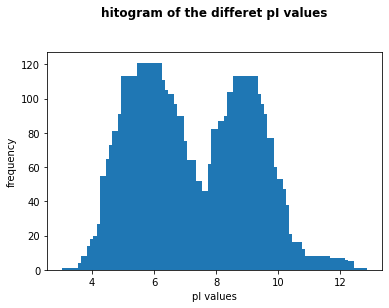

In [ ]:
'''
Part B
Calculating the pI for the entire proteome of human
'''
import Bio 
from Bio import SeqIO as SI
from google.colab import drive
import matplotlib.pyplot as plt

sequences=[]  # list of the proteins sequences
for record in SI.parse("/content/uniprot_sprot.fasta", "fasta"):  # going through the fasta from uniport
  if 'OS=Homo sapiens' in record.description:  # if the orginism is human
   sequences.append(str(record.seq))  # add the sequence to the list

different_pIs={}   # a dictionary with all the different pIs of the human proteins that were found
for i in range(len(sequences)):  # going theough all the sequences
  s=seq(sequences[i])   # a show of the class seq is built for each sequence (str)
  p=s.pI()      # calculation of the pI of the seq that was built
  if p in different_pIs:   # if we already have a record of this pI
    different_pIs[p]+=1  # add 1 to it's value in the dictionary
  else:
    different_pIs[p]=1  # create a new key for this pI and put 1 in it's value

plt.bar(different_pIs.keys(), different_pIs.values()) # create a bar plot with the pH keys and values. 
plt.xlabel('pI values')  # X axis name
plt.ylabel('frequency')  # Y axis name
plt.title('hitogram of the differet pI values\n\n',fontweight ="bold") # plot title


ניתן לראות בהיסטוגרמה שערכי ה-PI
מתחלקים לאזור חומצי מעט ולאזור בסיסי מעט.
זה מובן מכיוון שחלבונים באדם בדרך כלל צריכים להיות לא נייטרלים אלא בעלי מטען בשביל לתפקד, אך גם המטען צריך להיות לא גדול מידי, ולכן התפלגות הערכים הגיונית מאד.

In [ ]:
'''
Part C
Implement of the class “TrieNode”.
( building a Prefix tree )
'''
class TrieNode:

  def __init__(self,let='*'):  # the constructor
    self.letter=let
    self.sons=[]
    self.isEnd=False

  def Insert(self,word):  # adds a son to the spesific node
    if len(word)==0:   # if this is the last letter of the word
      self.isEnd=True  # mark the node as the end of a word
      return
    for son in self.sons:  # going through akk the node's sons
      if son.letter==word[0]:  # if one of the sons has the letter that is the first letter in the word we're entering
        son.Insert(word[1:])  # make the son insert the rest of the word
        return
    t=TrieNode(word[0])  # if their is no son with the wanted letter- build a new son with the letter
    t.Insert(word[1:])  # then make the new son insert the rest of the word
    self.sons.append(t) # add the new son to your list of sons

  def isExit(self,word):  #checks if a word exists in a tree
    if len(word)==0:  # if you got to the end of the word and didn't stop yet the word dosen't exist in the tree
      return False
    for son in self.sons:  # going through the sons
      if son.letter==word[0]:  # if one of the sons has the wanted letter
        if son.isEnd==True and len(word)==1:  # if this is the end of the word
          return True  #the word exists
        return son.isExit(word[1:])  # if it's not the end of the word-continue searching the son's sons with the rest of the word
    return False
      
a=TrieNode()
a.Insert('sami')
a.Insert ("uzi")
a.Insert('uza')

b=TrieNode()
b.Insert('Bob')
b.Insert('Bos')

print(a.isExit("uzi"))
print(a.isExit("sami"))
print(a.isExit('uza'))
print(a.isExit("sam"))
print(a.isExit("samir"))
print(a.isExit("ami"))
print(a.isExit("rami"))
print(b.isExit("Bob"))
print(b.isExit("Bo"))


True
True
True
False
False
False
False
True
False
